In [2]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# load as Pandas dataframe
login = pd.read_json(r'C:\Users\Shweta\Documents\gitrepo\ultimate_challenge\logins.json')
login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


We notice that the login_time is not sorted.

In [4]:
login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
login.max()

login_time   1970-04-13 18:57:38
dtype: datetime64[ns]

In [6]:
login.min()

login_time   1970-01-01 20:12:16
dtype: datetime64[ns]

Part 1 ‐ Exploratory data analysis
Aggregate the login counts based on 15minute
time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [7]:
#Since we know that login is the right data type, as in any time series, we first prep the data- Sort it.
login = login.sort_values('login_time') 

login.head()

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37


In [8]:
# setting the index right
login = login.reset_index(drop=True)
login.head()

,login_time
0,1970-01-01 20:12:16
1,1970-01-01 20:13:18
2,1970-01-01 20:16:10
3,1970-01-01 20:16:36
4,1970-01-01 20:16:37


In [9]:
#Now we first create a series - IC with a time delta of 15 mins and for now fill it with zeros. 

interval_count = pd.date_range('1970-01-01 20:00:00', '1970-04-13 19:00:00', freq='15T')
IC = pd.Series(np.zeros(len(interval_count)), index=interval_count)
IC.head()

1970-01-01 20:00:00    0.0
1970-01-01 20:15:00    0.0
1970-01-01 20:30:00    0.0
1970-01-01 20:45:00    0.0
1970-01-01 21:00:00    0.0
Freq: 15T, dtype: float64

In [10]:
a = 0 
for i in range(len(login)):
    b = IC.index[a] #b captures start time
    c = IC.index[a+1] #c captures end time
    j = login['login_time'][i]
    if b < j < c:
        IC[a] = IC[a] + 1
    else:
        while (c < j): #increment to the next time 
            a = a + 1 
            b = IC.index[a] #change start time
            c = IC.index[a+1] # change end time
        IC[a] = IC[a] + 1

In [11]:
IC.head(20)

1970-01-01 20:00:00     2.0
1970-01-01 20:15:00     6.0
1970-01-01 20:30:00     9.0
1970-01-01 20:45:00     7.0
1970-01-01 21:00:00     1.0
1970-01-01 21:15:00     4.0
1970-01-01 21:30:00     0.0
1970-01-01 21:45:00     4.0
1970-01-01 22:00:00     9.0
1970-01-01 22:15:00     8.0
1970-01-01 22:30:00     1.0
1970-01-01 22:45:00     3.0
1970-01-01 23:00:00    16.0
1970-01-01 23:15:00    13.0
1970-01-01 23:30:00    15.0
1970-01-01 23:45:00    14.0
1970-01-02 00:00:00    11.0
1970-01-02 00:15:00    17.0
1970-01-02 00:30:00    12.0
1970-01-02 00:45:00    13.0
Freq: 15T, dtype: float64

In [13]:
type(IC)

pandas.core.series.Series

In [14]:
#we convert it to a dataframe to make plotting and subsetting easier
new_IC = IC.to_frame().reset_index()

In [15]:
new_IC.head()

,index,0
0,1970-01-01 20:00:00,2.0
1,1970-01-01 20:15:00,6.0
2,1970-01-01 20:30:00,9.0
3,1970-01-01 20:45:00,7.0
4,1970-01-01 21:00:00,1.0


In [16]:
list(new_IC)

['index', 0]

In [19]:
# rename columns 
new_IC.rename(columns={'index': 'Time_int_15', 0: 'Total_count'}, inplace=True)


In [21]:
# set the time as index converting to a time series
new_IC.set_index('Time_int_15', inplace=True)

In [22]:
new_IC.head()

,Total_count
Time_int_15,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0


<AxesSubplot:xlabel='Time_int_15'>

<Figure size 2160x720 with 0 Axes>

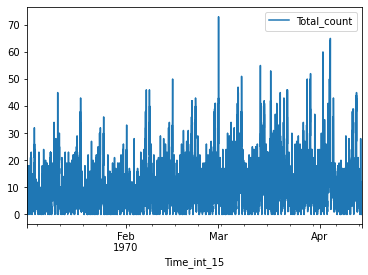

In [23]:
plt.figure(figsize=(30,10)) 
new_IC.plot()

There are regular peaks and valleys at regular intervals which could be weekly. There are also 4 peaks in a month. 

<AxesSubplot:xlabel='Time_int_15'>

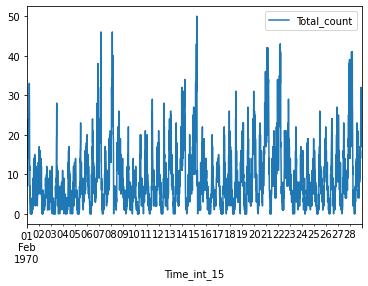

In [33]:
# Select all FEb data -that is just one month.

new_IC[new_IC.index.month == 2].plot()

We again see a peak every 6-7 days. These could possibly be weekends

<AxesSubplot:xlabel='Time_int_15'>

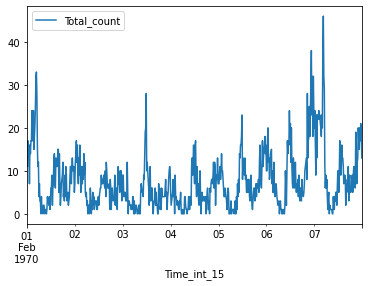

In [34]:
#Lets check the weekly data to check for patterns, for now we check for first week of FEB
new_IC['1970-02-01':'1970-02-07'].plot()

There is a valley and a peak every day. Could there be certain times when this peak occurs? Lets subset with just a day- Say Jan 1st

<AxesSubplot:xlabel='Time_int_15'>

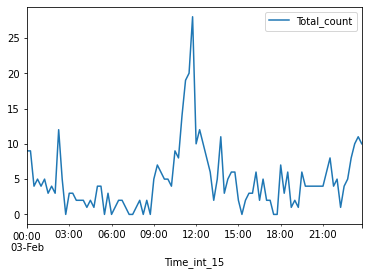

In [35]:
#Lets check the daily data to check for patterns
new_IC['1970-02-3':'1970-02-03'].plot()

Interestingly, there is peak at 3 am, then the activity peaks around noon and then again reaches a high in the night after 10 pm

Conclusion:

1) Login activities are higher during the weekends.
2) They tend to be the max around noon/ afternoon and are the lowest in the morning hours.
3) The activity in the evening -post 6 pm is way higher than the activity in the morining - 6 to 9 am.
4) Activity again soars after 10/10.30 pm. 

The biggest data quality issue was that the login times were randomly organized, but that has been sorted.

Part II
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a) how you will implement the experiment
b) what statistical test(s) you will conduct to verify the significance of the
observation
c) how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

Answer:
    Prior to any announcements, I would track drivers' (I'm not sure how large the driver pool is, but tracking all of them initially would be helpful) city habits both on weekdays and weekends. Which cities are they spending the majority of their time, or are they split. Then I would inform all of them (the prior weeks serves as the control and it would be difficult to be sure drivers did not share the information if only a selection were chosen) of the changed toll policy. Again, their trips per city would be tracked. It would be especially noteworthy to note how many times the city location changes per day. I would use a t-test to compare the average number of trips back and forth as well as trips in the non-weekday city. I would also compute an effect size as the number of trips may make it easy to find significance so that we know if the difference is meaningful. If the the effect size is greater than .25 I would then compute an actual cost analysis to see if the cost of the program is outweighed by the extra money brought in. With both of those true I would encourage the policy to be made permanent.

Part 3 ‐ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).

In [36]:
with open('./ultimate_data_challenge.json') as f:
    data = json.load(f)

u_df = pd.DataFrame(data)
u_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [37]:
u_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


We notice incorrect data types especially for dates

In [38]:
u_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [39]:
u_df[['last_trip_date','signup_date']].describe()

,last_trip_date,signup_date
count,50000,50000
unique,182,31
top,2014-06-29,2014-01-18
freq,2036,2948


In [40]:
#this sequence runs through the dataframe, creates a date six months from the start date, and then checks if the last trip falls
#within a 30 days of that time. Then it ouputs a 1 or 0 to a list of active users.

active = []
for i in range(len(u_df)):
    st = pd.Timestamp(u_df['signup_date'][i]) #get start date
    et = st + pd.Timedelta('181D') #6 months later
    at = et - pd.Timedelta('30D') #set point 30 days prior
    if at <= pd.Timestamp(u_df['last_trip_date'][i]) <= et:
        active.append([1]) # now that the active condition has been met, set active user to 1
    else:
        active.append([0])

In [41]:
df1 = pd.DataFrame(active,columns = ['active_users'])

In [42]:
df1['active_users'].value_counts()

0    37802
1    12198
Name: active_users, dtype: int64

In [43]:
# percentage of active users
12198/50000*100

24.396

## Categorical Data

In [44]:
df = pd.concat([u_df, df1], axis = 1)

In [45]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_users
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [46]:
# Table of ultimate black vs active
ub_active = pd.crosstab(index=df["active_users"], 
                            columns=df["ultimate_black_user"],
                             margins=True)   # Include row and column totals

ub_active.columns = ["Not Ultimate Black","Is Ultimate Black","rowtotal"]
ub_active.index= ["Not Active","Is Active","coltotal"]

ub_active

,Not Ultimate Black,Is Ultimate Black,rowtotal
Not Active,25204,12598,37802
Is Active,5942,6256,12198
coltotal,31146,18854,50000


Ultimate Black looks like a good feature to include as more than half of active users are ultimate black users but less than 40% of overall users are ultimate black users. This is a significant jump in frequency.

In [47]:
# Table of phone type vs active
phone_active = pd.crosstab(index=df["active_users"], 
                            columns=df["phone"],
                             margins=True)   # Include row and column totals

phone_active.columns = ["Android","iPhone","rowtotal"]
phone_active.index= ["Not Active","Is Active","coltotal"]

phone_active

,Android,iPhone,rowtotal
Not Active,13096,24394,37490
Is Active,1926,10188,12114
coltotal,15022,34582,49604


While Android users make up about 30% of the total users, they only make up 15% of active users. So the phone type does seem to be an indicator.

In [48]:
# Table of ultimate black vs active
city_active = pd.crosstab(index=df["active_users"], 
                            columns=df["city"],
                             margins=True)   # Include row and column totals

city_active.columns = ["Astapor","King's Landing",'Winterfell',"rowtotal"]
city_active.index= ["Not Active","Is Active","coltotal"]

city_active

,Astapor,King's Landing,Winterfell,rowtotal
Not Active,13838,6099,17865,37802
Is Active,2696,4031,5471,12198
coltotal,16534,10130,23336,50000


Astapor and King's Landing have ratios outside of the standard active/not active rate

## Continous Data

<AxesSubplot:xlabel='avg_dist', ylabel='active_users'>

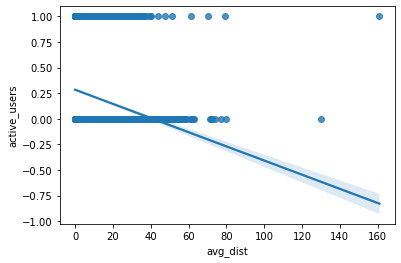

In [50]:
sns.regplot(y=df1['active_users'], x=u_df['avg_dist'], fit_reg = True)

It appears that the longer the average distance, the less likely one is to be active. This makes sense in that someone who is taking a one-time, longer trip may have been longer on average.

<AxesSubplot:xlabel='surge_pct', ylabel='active_users'>

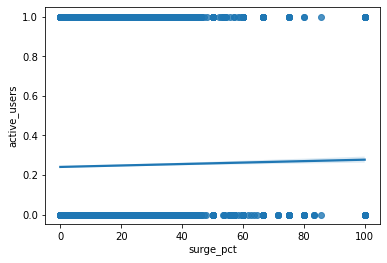

In [51]:
sns.regplot(y=df1['active_users'], x=u_df['surge_pct'], fit_reg = True)

There is almost no correlation here.

<AxesSubplot:xlabel='avg_rating_by_driver', ylabel='avg_rating_of_driver'>

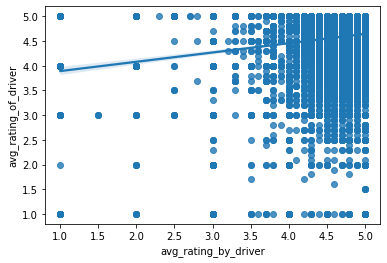

In [54]:
sns.regplot(y=u_df['avg_rating_of_driver'], x=u_df['avg_rating_by_driver'], fit_reg = True)

There is not as strong a correlation here as expected, so we will check each indvidually against active users

<AxesSubplot:xlabel='avg_rating_by_driver', ylabel='active_users'>

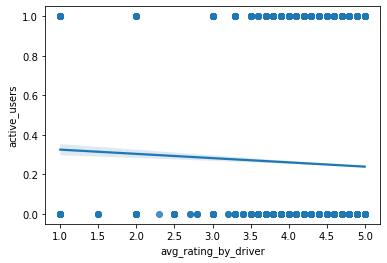

In [55]:
sns.regplot(y=df1['active_users'], x=u_df['avg_rating_by_driver'], fit_reg = True)

<AxesSubplot:xlabel='avg_rating_of_driver', ylabel='active_users'>

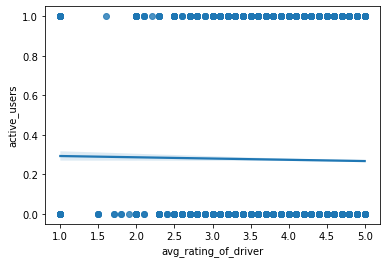

In [56]:
sns.regplot(y=df1['active_users'], x=u_df['avg_rating_of_driver'], fit_reg = True)

Average rating by driver has a stronger (negative) correlation

<AxesSubplot:xlabel='weekday_pct', ylabel='active_users'>

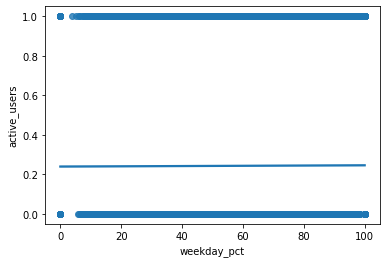

In [57]:
sns.regplot(y=df1['active_users'], x=u_df['weekday_pct'], fit_reg = True)

We notice zero correlation again.

<AxesSubplot:xlabel='trips_in_first_30_days', ylabel='active_users'>

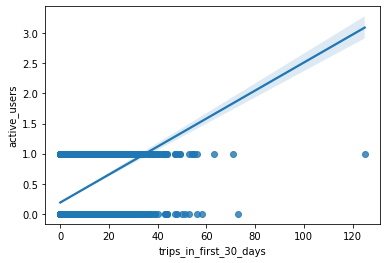

In [58]:
sns.regplot(y=df1['active_users'], x=u_df['trips_in_first_30_days'], fit_reg = True)

We see a strong correlation here.

## Build Predictive Model

In [66]:
#transforming categorical features into numerical for predictive modeling
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['Astapor',"King's Landing",'Winterfell'])
LE = preprocessing.LabelEncoder()
LE.fit(['iPhone','Android'])

LabelEncoder()

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41445 entries, 0 to 41444
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    41445 non-null  object 
 1   trips_in_first_30_days  41445 non-null  int64  
 2   signup_date             41445 non-null  object 
 3   avg_rating_of_driver    41445 non-null  float64
 4   avg_surge               41445 non-null  float64
 5   last_trip_date          41445 non-null  object 
 6   phone                   41445 non-null  object 
 7   surge_pct               41445 non-null  float64
 8   ultimate_black_user     41445 non-null  bool   
 9   weekday_pct             41445 non-null  float64
 10  avg_dist                41445 non-null  float64
 11  avg_rating_by_driver    41445 non-null  float64
 12  active_users            41445 non-null  int64  
dtypes: bool(1), float64(6), int64(2), object(4)
memory usage: 3.8+ MB


In [68]:
# We drop the missing values.
df = df.dropna()
df = df.reset_index(drop = True)

In [69]:
creation1 = le.transform(df['city']) #transform the categorical data into number labels
creation2 = LE.transform(df['phone'])

In [70]:
df2 = pd.DataFrame(creation1,columns = ['city#']) # add them to the dataframe
df3 = pd.DataFrame(creation2, columns = ['phone#'])
df = pd.concat([df,df2,df3],axis =1 )

In [71]:
len(df)

41445

In [72]:
df = df.drop(['city','phone'], axis=1) # no need for old columns

In [73]:
#final cleaning step - change true/false labels to 1/0's. 
UB = []
for i in range(len(df)):
    if df['ultimate_black_user'][i] == True:
        UB.append([1]) 
    else:
        UB.append([0])
df4 = pd.DataFrame(UB,columns = ['UB'])
df4.head()

,UB
0,1
1,0
2,0
3,1
4,0


In [74]:
df = pd.concat([df,df4],axis =1 )
df = df.drop(['ultimate_black_user'], axis=1) # no need for old columns
df.head() #ready for model

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active_users,city#,phone#,UB
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,46.2,3.67,5.0,0,1,1,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,50.0,8.26,5.0,0,0,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,100.0,0.77,5.0,0,0,1,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,80.0,2.36,4.9,1,1,1,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,82.4,3.13,4.9,0,2,0,0


In [75]:
#splitting into features and target
y = df['active_users']
X = df[['avg_dist', 'avg_rating_by_driver','trips_in_first_30_days', 'city#', 'phone#','UB']]

In [89]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
score = logreg.score(X_test, y_test)
print(score)

[[11677   375]
 [ 3949   577]]
              precision    recall  f1-score   support

           0       0.75      0.97      0.84     12052
           1       0.61      0.13      0.21      4526

    accuracy                           0.74     16578
   macro avg       0.68      0.55      0.53     16578
weighted avg       0.71      0.74      0.67     16578

0.7391723971528532


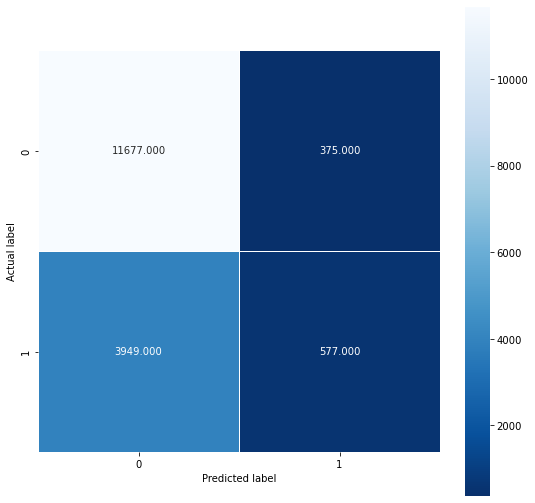

In [88]:
#Using seaborn to display the confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

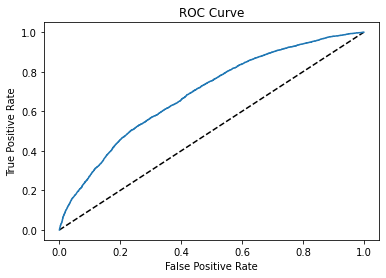

In [90]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [91]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv = 5,scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.6908361472798901
AUC scores computed using 5-fold cross-validation: [0.69648048 0.69118337 0.68945508 0.69698036 0.70472593]


In [92]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 19306.977288832535}
Best score is 0.7426227530462057


We also try an ensemble method

In [93]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [94]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# fit model to training data
model = XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Text(0, 0.5, 'Feature Importance Score')

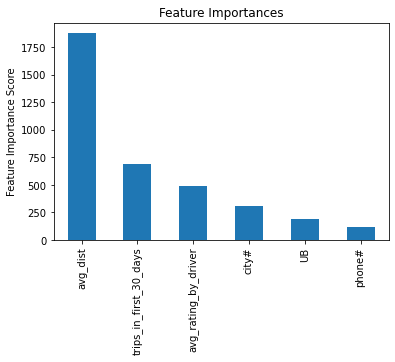

In [95]:
feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [96]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.27%


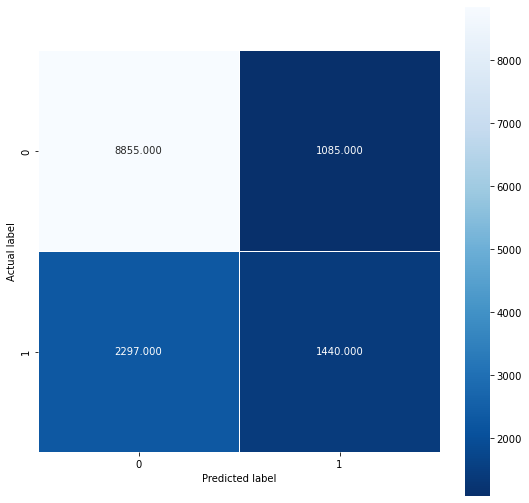

In [97]:
#Using seaborn to display the confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

## Conclusion

The approach was to determine the number of active users (about 24%), identify variables that were correlated to activity and build a model using those variables to predict active users. This is a binary classification problem. While the Logistic regression model has an accuracy score of 74% it does a better job of predicting the non active users than the active users.The XGBoost model gives a higher accuracy and also does a slightly better job of predicting the active users. 

The idea of the "sixth month" is not clear as even a shift of a few days dramatically changes the percentage of users considered active.

One way to improve the accuracy could be to normalize the features to minimize any bias from different scales. As is however, average distance was the most important feature. This implies that users who use the service for local, smaller trips are most likely to engage frequently and remain active. Running retention campaigns on those local users could help in having a long term rider retention. Also King's landling users are very active, so we could compare the rest with King's landing to check how we could improve.  